In [104]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hides warnings in the notebook
from warnings import filterwarnings
filterwarnings('ignore')

In [105]:
# Set plots properties
sns.set_style('darkgrid')

In [106]:
# Dataset url
file_url = 'https://raw.githubusercontent.com/faadeola/credit-risk-ml-prediction/refs/heads/main/credit_risk_dataset.csv'

# Read dataset for analysis
credit = pd.read_csv(file_url)

# Actual column names
feature_desc_mapping = {
    'person_age' : 'Age',
    'person_income' : 'Annual Income',
    'person_home_ownership' : 'Home Ownership',
    'person_emp_length' : 'Employment Length (in years)',
    'loan_intent' : 'Loan Intent',
    'loan_grade' : 'Loan Grade',
    'loan_amnt' : 'Loan Amount',
    'loan_int_rate' : 'Interest Rate (%)',
    'loan_status' : 'Loan Status',
    'loan_percent_income' : 'Percent Income',
    'cb_person_default_on_file' : 'Historical Default',
    'cb_person_cred_hist_length' : 'Credit History Length'
    }

In [107]:
#vShow 10 random rows in the dataset
credit.sample(frac=0.15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4518,23,70000,RENT,2.0,PERSONAL,C,4800,NaN,0,0.07,N,2
2880,26,67500,RENT,0.0,EDUCATION,B,3000,8.88,0,0.04,N,2
18386,27,70000,RENT,4.0,EDUCATION,B,20000,11.48,0,0.29,N,9
27906,27,100000,MORTGAGE,11.0,PERSONAL,A,14400,NaN,0,0.14,N,8
24166,27,43200,RENT,4.0,EDUCATION,A,10000,7.49,0,0.23,N,10
...,...,...,...,...,...,...,...,...,...,...,...,...
13577,23,38500,RENT,8.0,DEBTCONSOLIDATION,A,12800,8.90,1,0.33,N,4
7399,26,41000,RENT,3.0,DEBTCONSOLIDATION,C,6600,13.85,0,0.16,Y,4
17786,25,70000,MORTGAGE,9.0,EDUCATION,B,16000,12.18,0,0.23,N,4
6021,26,102552,RENT,10.0,MEDICAL,B,5600,9.99,0,0.05,N,3


# Exploratory Data Analysis
This section explores the data file further to understand the structure and distribution

In [108]:
# Shape of the dataset
print(f'Data has {credit.shape[0]} rows and {credit.shape[1]} columns')

Data has 32581 rows and 12 columns


In [109]:
# General overview of the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [110]:
# Display statistical information about the numerical columns
credit.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.73,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.85,61983.12,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.79,4.14,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.37,6322.09,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.01,3.24,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.80,4.06,2.00,3.00,4.00,8.00,30.00


In [111]:
# Check for duplicates in data
has_duplicates = credit.duplicated().sum()

print(f'{has_duplicates} duplicates found in the data')

# Drop duplicates if any
credit.drop_duplicates(inplace=True)

165 duplicates found in the data


In [112]:
""" Group numerical and categorical data type"""
numerical_columns = credit.select_dtypes(include=['int64','float64']).drop(columns='loan_status') #For numerical data types
categorical_columns = credit.select_dtypes(include='object') #For categorical data types

In [113]:
# Get all unique values for categorical columns
for column in categorical_columns:
  print(f'{column}: {credit[column].unique()}')

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file: ['Y' 'N']


In [114]:
# Checks for null values
credit.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [115]:
""" Fill missing values in the order of Mode (categorical data) and Mean (Numerical data) """

#Fill categorical data
for column in categorical_columns:
    if credit[column].isnull().sum() > 0:
        credit[column] = credit[column].fillna(credit[column].mode())

# Fill numerical data
for column in numerical_columns:
    if credit[column].isnull().sum() > 0:
        credit[column] = credit[column].fillna(credit[column].mean())

In [116]:
# Check if null value still exists
credit.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [117]:
credit['loan_intent'] = credit['loan_intent'].str.replace('DEBTCONSOLIDATION','Debt Consolidation').str.replace('HOMEIMPROVEMENT','Home Improvement')
credit['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,6411
MEDICAL,6042
VENTURE,5682
PERSONAL,5498
Debt Consolidation,5189
Home Improvement,3594


In [118]:
# Standardized values in the object columns to title case
for column in categorical_columns:
    credit[column] = credit[column].str.strip().str.title()

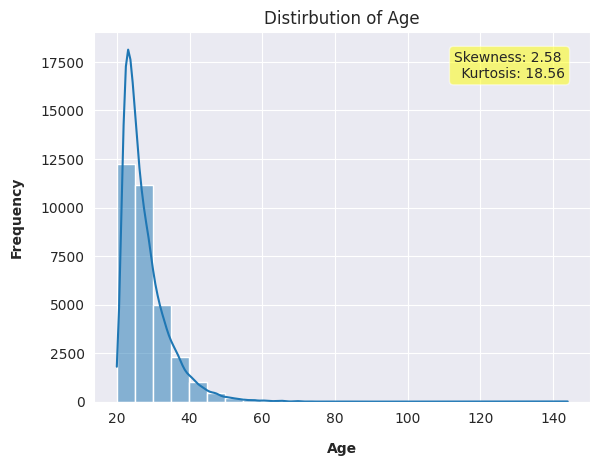

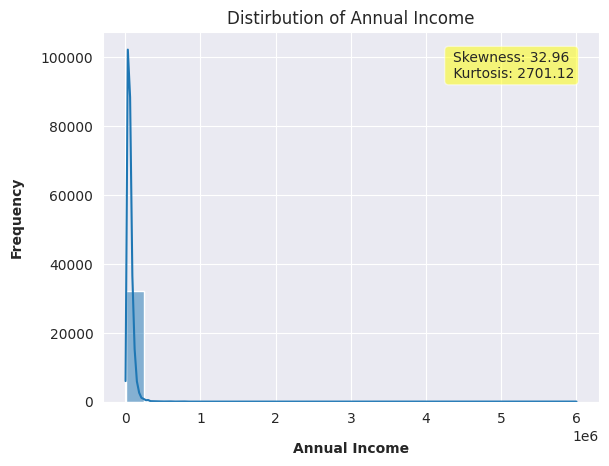

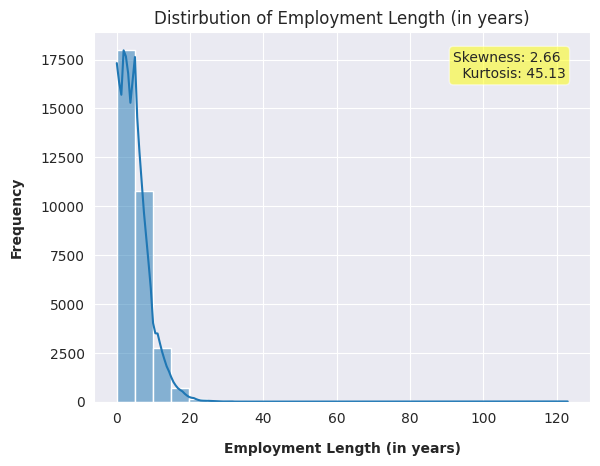

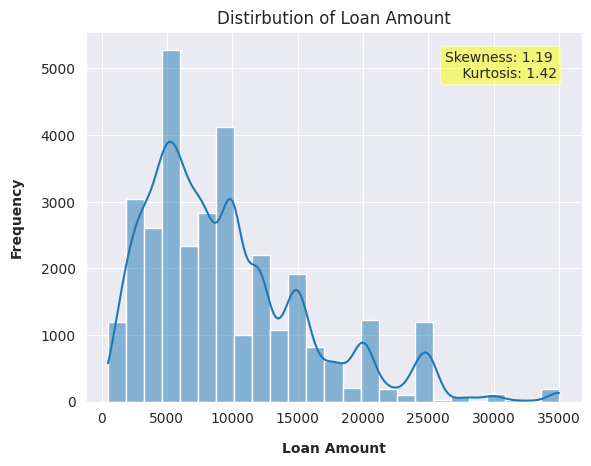

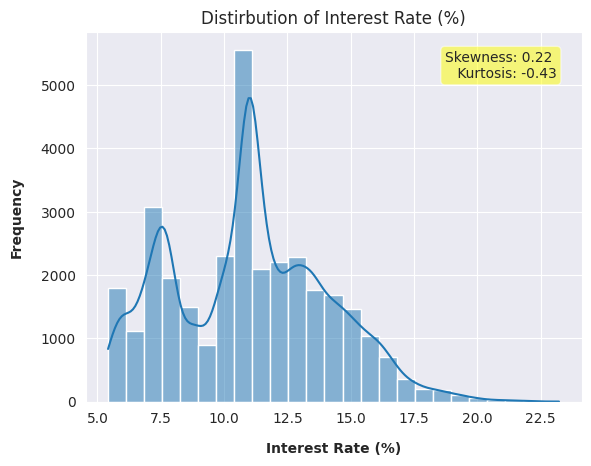

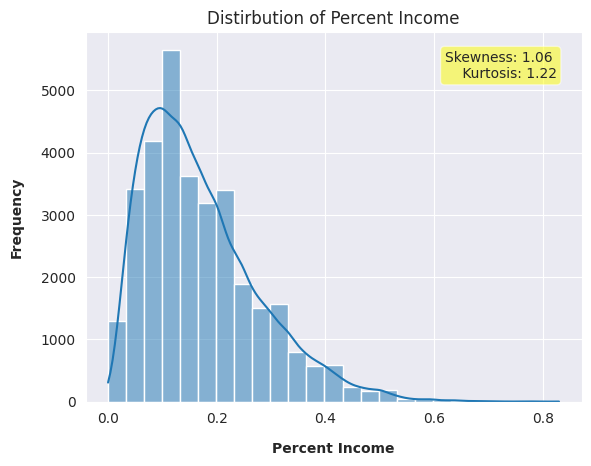

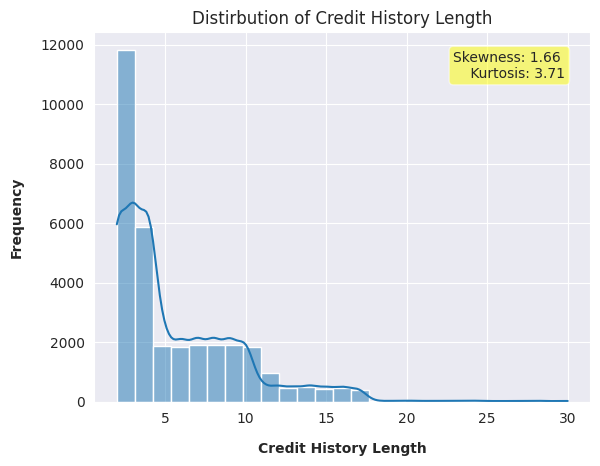

In [119]:
# Plot histogram of the numerical columns in the dataset to understand data distributions
for col in numerical_columns:
  fig, ax = plt.subplots()
  sns.histplot(credit[col],kde=True, bins=25)
  plt.title(f'Distribution of {feature_desc_mapping[col]}', fontweight='semibold')
  plt.text(0.95,0.95,f'Skewness: {credit[col].skew():.2f} \n Kurtosis: {credit[col].kurtosis():.2f}',transform = ax.transAxes, horizontalalignment = 'right', verticalalignment = 'top', bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
  plt.xlabel(f'{feature_desc_mapping[col]}', labelpad=12)
  plt.ylabel('Frequency', labelpad=12)
  plt.show()

  # Print line break after each plot
  print('\n')

In [120]:
''' Check for outliers in the data'''

def get_outlier(column):
    # This function returns the outliers in a column

    Q1 = credit[column].quantile(0.25)
    Q3 = credit[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR) #--Get the lower bound values
    upper_bound = Q3 + (1.5 * IQR) #--Get the upper bound values

    outliers = ((credit[column] < lower_bound) | (credit[column] > upper_bound))

    return outliers.sum()

# Dictionary to hold outliers in each columns
num_col_list = []
col_outlier = []


# Get the number of outliers in each column
for col in numerical_columns:
    num_col_list.append(col) #-- Add column name to list
    col_outlier.append(get_outlier(col)) # Add number of outlier found to a list

# Display dictionary information
outlier_df = pd.DataFrame({'Outlier Count': col_outlier}, index=num_col_list)
outlier_df.head()

,Outlier Count
person_age,1491
person_income,1478
person_emp_length,852
loan_amnt,1679
loan_int_rate,70


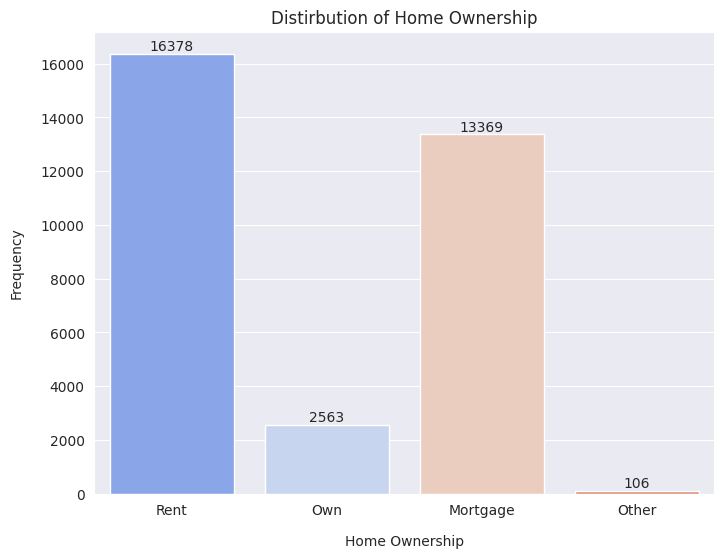

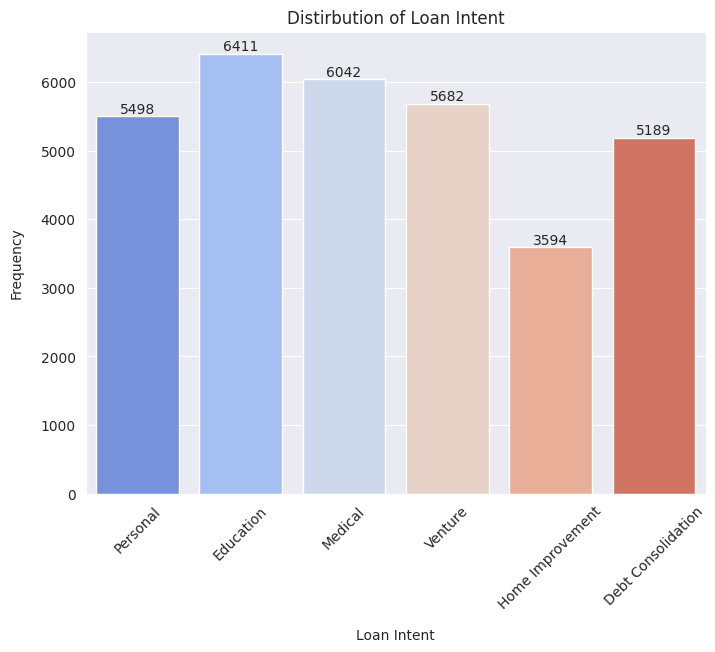

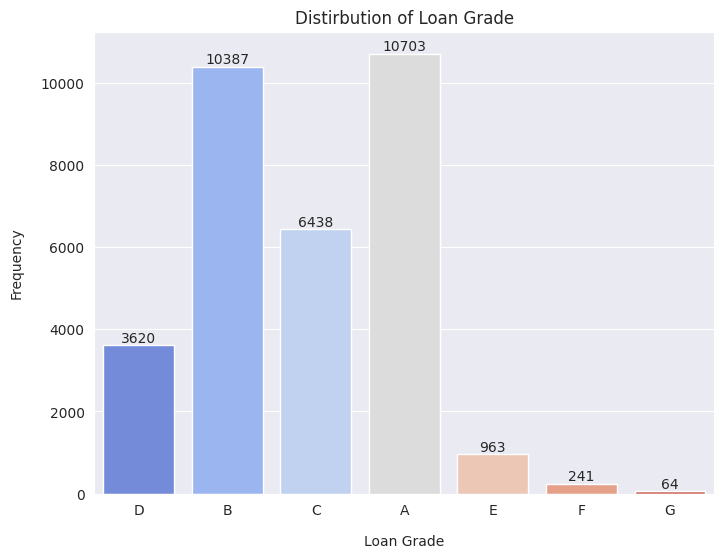

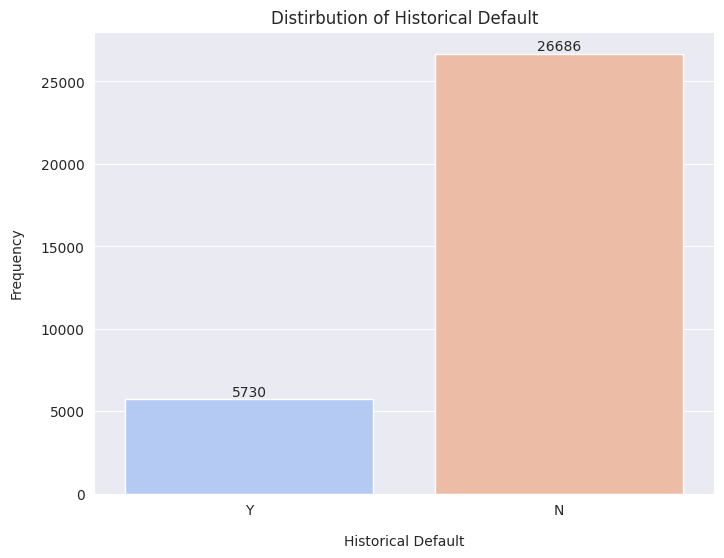

In [121]:
# Display count plot to understand distribution of categorical data
for col in categorical_columns.columns:
  fig,ax = plt.subplots(figsize=(8,6), dpi=100)
  sns.countplot(data=credit, x= f'{col}', palette='coolwarm', ax=ax)
  plt.title(f'Distirbution of {feature_desc_mapping[col]}')
  plt.xlabel(f'{feature_desc_mapping[col]}', labelpad=12)

  if col == 'loan_intent':
    plt.xticks(rotation=45)

  plt.ylabel('Frequency', labelpad=12)

  # Add count labels on top of each bar
  for container in ax.containers:
      ax.bar_label(container, fmt='%d', label_type='edge')

  plt.show()

  # Print line break after each plot
  print('\n')

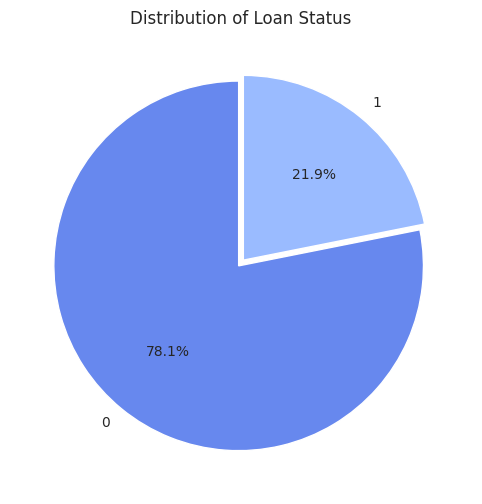

In [135]:
# Distribution of target feature
frequency = credit['loan_status'].value_counts()

fig,ax= plt.subplots(figsize=(8,6))
plt.pie(frequency.values, labels=frequency.index, autopct='%1.1f%%', startangle=90, explode=[0.02,0.02], colors=sns.color_palette('coolwarm'))
plt.title('Distribution of Loan Status')
plt.show()

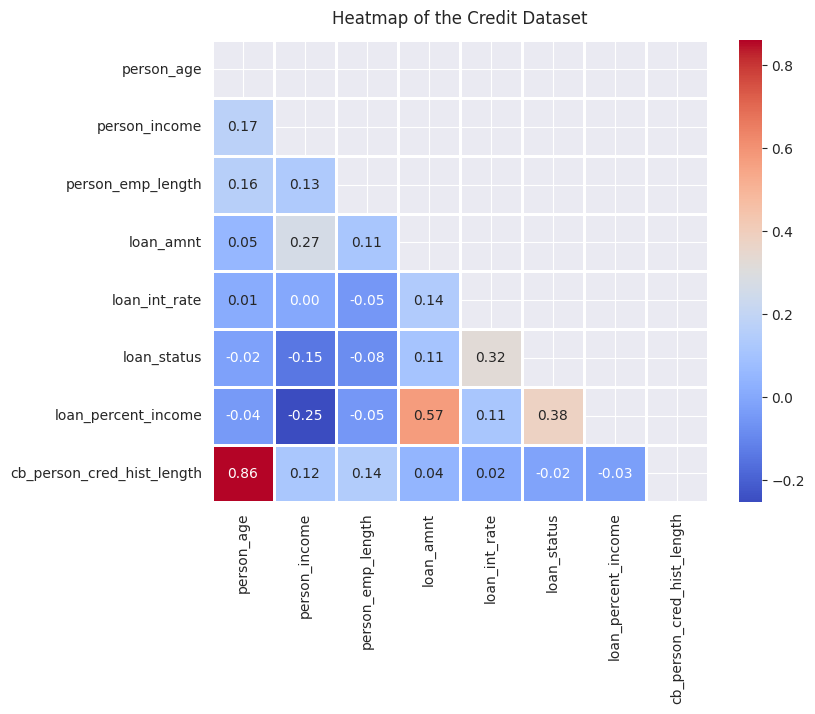

In [123]:
# Heat map of credit data
credit_corr = credit.corr(numeric_only=True)
mask = np.triu(np.ones_like(credit_corr))
plt.subplots(figsize=(8,6))
sns.heatmap(data=credit_corr, mask=mask, fmt='.2f', annot=True, cmap='coolwarm', linewidths=2, cbar=True)
plt.title('Heatmap of the Credit Dataset', pad=12)
plt.xticks(fontsize=10)
plt.show()


# Feature Engineering
Feature modification section for the project

In [124]:
"""Classify person into age groups"""
# categorize age into groups
bin = [20,30,40,50,60,120]
age_label = ['20-30','31-40','41-50','51-60','60 and above']

# create group and add to daataset as a new column
credit['Age group'] = pd.cut(credit['person_age'],bins=bin, labels=age_label, right=True, include_lowest=True)